In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import table

In [2]:
opentable= pd.read_csv('opentablecleaned.csv')

In [3]:
opentable.sort_values('promoted',ascending = False).head()

,Unnamed: 0,area,cost,cuisine,link,location,location_on_page,name,promoted,rating,review_count,review_link
98635,98635,"Washington, D.C. Area",2,American,https://www.opentable.com/r/cheesetique-mosaic...,Fairfax,"[11, 0]",Cheesetique - Mosaic,True,75.0,195.0,https://www.opentable.com/r/cheesetique-mosaic...
127713,127713,Dallas - Fort Worth,3,American,https://www.opentable.com/r/table-13-addison?a...,North Dallas / Addison,"[4, 0]",Table 13,True,80.0,1943.0,https://www.opentable.com/r/table-13-addison?a...
58440,58440,New York / Tri-State Area,3,American,https://www.opentable.com/r/perrine-new-york?a...,Upper East Side,"[12, 5]",Perrine,True,70.0,373.0,https://www.opentable.com/r/perrine-new-york?a...
58439,58439,New York / Tri-State Area,4,Steakhouse,https://www.opentable.com/r/bobs-steak-and-cho...,Midtown East,"[12, 4]",Bob's Steak & Chop House - New York,True,75.0,250.0,https://www.opentable.com/r/bobs-steak-and-cho...
53641,53641,New York / Tri-State Area,3,Steakhouse,https://www.opentable.com/r/ruths-chris-steak-...,Jersey City,"[60, 6]",Ruth's Chris Steak House - Jersey City,True,75.0,260.0,https://www.opentable.com/r/ruths-chris-steak-...


In [4]:
opentable.isna().sum()

Unnamed: 0               0
area                   100
cost                     0
cuisine                  0
link                     0
location                 0
location_on_page         0
name                     0
promoted                 0
rating              121707
review_count        120693
review_link              0
dtype: int64

In [5]:
#without links
ot = opentable[['area','location','name','cuisine','cost','rating','review_count','promoted','location_on_page']]
ot.sample(10)

,area,location,name,cuisine,cost,rating,review_count,promoted,location_on_page
3571,Dublin,Islandbridge,Chesterfields Restaurant at the Ashling Hotel,Irish,2,NaN,NaN,False,"[3, 69]"
128055,Dallas - Fort Worth,Park Cities,Asian Mint | Inwood Village,Asian,2,80.0,45.0,False,"[1, 42]"
21001,Atlantic Canada,Wolfville,Annapolis Royal Golf & Country Club,European,2,NaN,NaN,False,"[2, 38]"
21354,Berlin,Friedrichshain,Fatoush,East African,2,NaN,NaN,False,"[15, 91]"
45129,Boston / New England,Merrimack,North Side Grille (the),American,2,NaN,NaN,False,"[47, 94]"
18773,Calgary / Southern Alberta,Calgary,Moxie's Grill & Bar - Barlow,Contemporary American,2,70.0,140.0,False,"[4, 10]"
74660,Portland / Oregon,Hillsboro,One Horse Tavern,Grill,2,NaN,NaN,False,"[21, 25]"
143923,Indiana,Fort Wayne,Klemms Kafe,American,2,NaN,NaN,False,"[27, 10]"
6279,Mexico City,Santa Fe / Bosques,Debbie & Peponne - Duraznos,International,2,75.0,3.0,False,"[6, 77]"
33477,Glasgow/Lanarkshire,Uddingston,Boh Cucina,Italian,2,90.0,51.0,False,"[3, 14]"


In [6]:
len(ot)

163813

In [7]:
rating_without_reviews = ot.rating.isna().sum() - ot.review_count.isna().sum()
rating_without_reviews

1014

In [8]:
percent_missing_rating = str(round(((ot.rating.isna().sum()/len(ot))*100),2)) +'%'
percent_missing_rating 

'74.3%'

# Scatter Plots

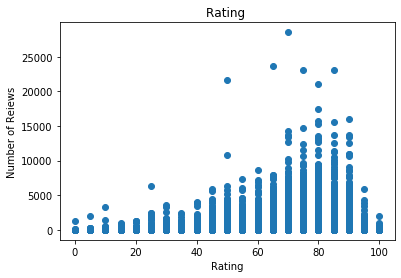

<Figure size 800x800 with 0 Axes>

In [9]:
plt.scatter(y = ot.review_count, x =ot.rating)
plt.title('Rating ')
plt.xlabel('Rating')
plt.ylabel('Number of Reiews')
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.show()

# Groupings
## Grouped by area

In [10]:
grouped_area_size = pd.DataFrame(ot.groupby('area').size(),columns = ['restaurant_count'])

In [11]:
grouped_area_size

,restaurant_count
area,
Atlanta / Georgia,6105
Atlantic Canada,1069
Baja California Sur,167
Barcelona,966
Berlin,1698
Boston / New England,10000
Calgary / Southern Alberta,1459
Cancun / Riviera Maya,364
Chicago / Illinois,10000


In [12]:
area_size_table = grouped_area_size.sort_values('restaurant_count',ascending = False).head(10)
area_size_table

,restaurant_count
area,
Los Angeles,10000
Chicago / Illinois,10000
New York / Tri-State Area,10000
Boston / New England,10000
Philadelphia / New Jersey Suburbs,8682
San Francisco Bay Area,8500
Toronto / Ontario,7414
Seattle / Eastern Washington,6247
Atlanta / Georgia,6105


## Grouped by location

In [13]:
grouped_location_size = pd.DataFrame(ot.groupby('location').size(),columns = ['restaurant_count'])

In [14]:
len(grouped_location_size)

3834

In [15]:
grouped_location_size.sort_values('restaurant_count', ascending = False)

,restaurant_count
location,
Downtown,2599
Sooke,1211
Detroit,1135
Richmond,895
Milwaukee,687
...,...
Sandyford (D16),1
East Elmhurst,1
Tottenham Hale,1


## Grouped by cost

In [16]:
grouped_cost_size = pd.DataFrame(ot.groupby('cost').size(),columns = ['restaurant_count'])

In [17]:
grouped_cost_size

,restaurant_count
cost,
2,138848
3,19773
4,5192


In [18]:
grouped_cost = ot.groupby('cost')

In [19]:
grouped_cost.agg(['mean','sum','count'])

rating                   review_count                    promoted  \
           mean        sum  count         mean        sum  count      mean   
cost                                                                         
2     62.549174  1783965.0  28521   276.190784  8109790.0  29363  0.001469   
3     68.794039   722475.0  10502   681.710338  7253398.0  10640  0.009356   
4     74.774570   230530.0   3083   840.726981  2620546.0   3117  0.014253   

                     
        sum   count  
cost                 
2     204.0  138848  
3     185.0   19773  
4      74.0    5192

In [20]:
grouped_cost.mean()

,rating,review_count,promoted
cost,,,
2,62.549174,276.190784,0.001469
3,68.794039,681.710338,0.009356
4,74.774570,840.726981,0.014253


In [21]:
grouped_cost.rating.mean()

cost
2    62.549174
3    68.794039
4    74.774570
Name: rating, dtype: float64

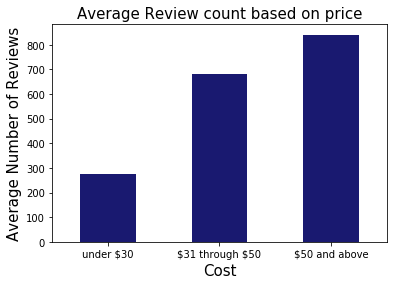

<Figure size 720x720 with 0 Axes>

In [22]:
grouped_cost.review_count.mean().plot.bar(color = 'midnightblue')
plt.xticks([0,1,2],labels= ['under \$30','\$31 through \$50','\$50 and above'],rotation = 0)
plt.title('Average Review count based on price',fontsize = 15)
plt.xlabel('Cost',fontsize = 15)
plt.ylabel('Average Number of Reviews',fontsize = 15)
plt.figure(figsize = (10,10))
plt.show()

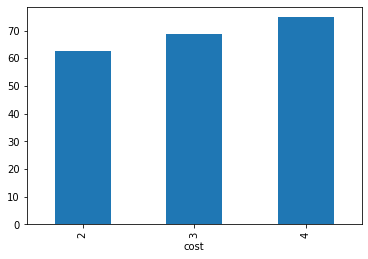

In [23]:
grouped_cost.rating.mean().plot.bar()

In [24]:
plt.bar(x = grouped_cost.rating.mean(), height = )

SyntaxError: invalid syntax (<ipython-input-24-2736e9e66761>, line 1)

## Group by promoted

In [25]:
grouped_promoted_size = pd.DataFrame(ot.groupby('promoted').size(),columns = ['restaurant_count'])

In [26]:
grouped_promoted_size

,restaurant_count
promoted,
False,163350
True,463


In [27]:
promoted_grouped = ot.groupby('promoted')
promoted_grouped.mean()

,cost,rating,review_count
promoted,,,
False,2.182577,64.951138,413.423796
True,2.719222,69.617904,756.000000


In [28]:
for key, values in promoted_grouped:
    print(key) #this indicates the grouping
    print('-'*70)
    print(values) #this is a dataframe for that 
    print('\n')

False
----------------------------------------------------------------------
                             area                location  \
0               Atlanta / Georgia  Airport / College Park   
1               Atlanta / Georgia                 Augusta   
2               Atlanta / Georgia                 Lilburn   
3               Atlanta / Georgia                  Smyrna   
4               Atlanta / Georgia                Buckhead   
...                           ...                     ...   
163808  Miami / Southeast Florida               Hollywood   
163809  Miami / Southeast Florida        Hallandale Beach   
163810  Miami / Southeast Florida        Hallandale Beach   
163811  Miami / Southeast Florida               Hollywood   
163812  Miami / Southeast Florida          Pembroke Pines   

                                          name        cuisine  cost  rating  \
0                       Spice House on Cascade      Caribbean     2     NaN   
1                     TBonz Stea

In [29]:
promoted_grouped.groups

{False: Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             163803, 163804, 163805, 163806, 163807, 163808, 163809, 163810,
             163811, 163812],
            dtype='int64', length=163350),
 True: Int64Index([    23,    123,    126,   3402,   3502,   3505,   3702,   3704,
               6102,   6104,
             ...
             158522, 158613, 158615, 158619, 162813, 162816, 162819, 163313,
             163315, 163321],
            dtype='int64', length=463)}

In [30]:
idx = pd.IndexSlice
promoted_grouped.loc[idx['True'], :]

AttributeError: Cannot access callable attribute 'loc' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [31]:
promoted_avg = grouped_promoted.mean()
promoted_avg

NameError: name 'grouped_promoted' is not defined

In [32]:
promoted_avg.plot.bar(x= ,y = 'cost', rot=0)

SyntaxError: invalid syntax (<ipython-input-32-c2adbdb5efc0>, line 1)

## Group by area and then location

In [33]:
grouped_area_location = ot.groupby(['area','location'])

In [34]:
grouped_area_location.mean()

cost     rating  review_count  \
area              location                                                    
Atlanta / Georgia Acworth                 2.046296  87.500000    567.000000   
                  Airport / College Park  2.088235  56.875000    216.812500   
                  Alpharetta              2.191781  62.647059    717.269231   
                  Athens                  2.217391  56.666667      1.000000   
                  Augusta                 2.074830  69.400000    333.666667   
...                                            ...        ...           ...   
Yorkshire         Wetherby                2.000000  70.000000     12.000000   
                  Whitby                  2.384615  68.636364    186.545455   
                  Woodlesford             4.000000  30.000000      6.000000   
                  Yarm                    2.090909  70.454545    177.181818   
                  York                    2.179688  58.221154    142.279279   

                                          promoted  
area              location                          
Atlanta / Georgia Acworth                      0.0  
                  Airport / College Park       0.0  
                  Alpharetta                   0.0  
                  Athens                       0.0  
                  Augusta                      0.0  
...                                            ...  
Yorkshire         Wetherby                     0.0  
                  Whitby                       0.0  
                  Woodlesford                  0.0  
                  Yarm                         0.0  
                  York                         0.0  

[4095 rows x 4 columns]

## group by cuisine

In [35]:
grouped_cuisine = ot.groupby('cuisine')

In [36]:
grouped_cuisine_size = pd.DataFrame(ot.groupby('cuisine').size(),columns = ['restaurant_count']) > 50

In [37]:
grouped_cuisine_size['restaurant_count']

cuisine
Afghan           False
African           True
Afternoon Tea     True
American          True
Argentinean       True
                 ...  
Wine Bar          True
Winery           False
Yakiniku          True
Yakitori         False
Yoshoku          False
Name: restaurant_count, Length: 237, dtype: bool

In [38]:
cuisine_rating = grouped_cuisine.rating.agg(['count','mean'])
cuisine_rating = cuisine_rating.sort_values('count',ascending = False)
cuisine_rating = cuisine_rating['mean'].head(10)

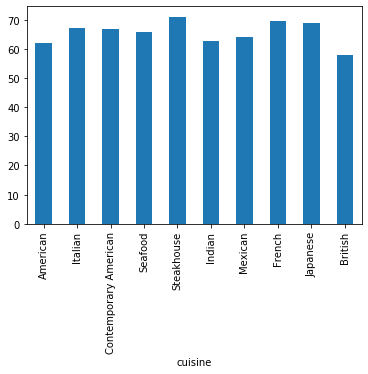

In [55]:
cuisine_rating.plot.bar(rot = 90)

# New York

In [69]:
first_page_filter = [idx for idx, x in enumerate(ot.location_on_page) if eval(x)[0]==0 ]
first_page_df = ot.iloc[first_page_filter]
first_page_df[['cost','rating','review_count']].mean()

cost              2.497500
rating           71.351857
review_count    775.344089
dtype: float64

In [70]:
ot_rating = ot.dropna(subset = ['rating','review_count'])

poorly_rated = ot_rating.loc[(ot_rating.rating < 50) & (ot_rating.review_count >= 10)]
poorly_rated.sort_values(['rating','review_count'])

,area,location,name,cuisine,cost,rating,review_count,promoted,location_on_page
6387,Mexico City,Del Valle / Nápoles / Narvarte,La Tavola - Del Valle,Italian,3,0.0,10.0,False,"[5, 85]"
157647,Los Angeles,Hollywood,Harold's Chicken & Bar,American,2,0.0,10.0,False,"[10, 34]"
117968,Chicago / Illinois,Bloomingdale,Strada Italia Ristorante and Wine Bar,Italian,2,0.0,11.0,False,"[46, 55]"
5266,Tokyo Metropolitan Area,Shinjuku,Mango Tree Cafe Shinjuku,Thai,2,0.0,12.0,False,"[7, 64]"
37425,Wisconsin,Wisconsin Dells,The Tavern Restaurant,American,2,0.0,12.0,False,"[25, 90]"
...,...,...,...,...,...,...,...,...,...
56304,New York / Tri-State Area,Gramercy / Flatiron,Les Halles Park Avenue - Permanently Closed,French,2,45.0,4201.0,False,"[34, 69]"
30533,London,Covent Garden,Fire & Stone Covent Garden,International,2,45.0,4254.0,False,"[5, 70]"
31009,London,Soho,Inamo - Soho,Japanese,3,45.0,4505.0,False,"[0, 46]"
58169,New York / Tri-State Area,Midtown West,Norma's,American,3,45.0,5574.0,False,"[15, 34]"


In [72]:
len(poorly_rated)/ len(ot_rating)*100

9.623331591697145